# Time Series Basics



Time series analysis is a branch of statistics and data analysis that deals with understanding the characteristics and patterns of data points collected sequentially over time. It is widely used in various fields such as economics, finance, meteorology, and engineering.

A time series is a sequence of data points typically measured at successive points in time, spaced at uniform time intervals. The notation used in time series analysis often includes:


- $Y_t$: The value of the time series at time $t$.

- $\Delta Y_t$: The first difference of the series at time $t$, defined as $\Delta Y_t = Y_t - Y_{t-1}$.

- $Y_{t-1}$, $Y_{t-2}$, \dots: Lagged values of the series, representing past values. For example, $Y_{t-1}$ is the value at time $t-1$.

- $\epsilon_t$: The error term or the noise at time $t$.

- AR(p): Autoregressive model of order $p$, where $p$ indicates the number of lagged terms used.

- MA(q): Moving average model of order $q$, where $q$ is the number of lagged forecast errors in the prediction equation.


Time series analysis aims to model these data points to understand the underlying structure, make forecasts, and extract meaningful statistics. Common objectives include identifying trends, seasonality, cycles, and other patterns in the data.



## Random Walk

A random walk is a stochastic process in which the next value is determined by adding a random step to the current value. Mathematically, it can be expressed as:

\begin{equation}
  y_t = y_{t-1} + \epsilon_t
\end{equation}

where:

- $y_t$ is the value of the process at time $t$
- $y_{t-1}$ is the value at the previous time step
- $\epsilon_t$ is a random error term, often assumed to be independent and identically distributed (i.i.d.) with mean 0 and variance $\sigma^2$

Key properties of random walks include:

- **No trend:** The mean of a random walk remains constant over time.
- **No seasonality:** There are no repeating patterns in a random walk.
- **Non-stationary:** The variance of a random walk increases over time.
- **Memoryless:** The future values of a random walk are independent of its past values (except for the most recent one).


## Stationarity

Augmented Dickey-Fuller (ADF) Test

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or not. The test is based on the following regression model:

\begin{equation}
    \Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \sum_{i=1}^{p} \delta_i \Delta Y_{t-i} + \epsilon_t
\end{equation}

where:

$\Delta Y_t = Y_t - Y_{t-1}$ is the first difference of the time series.

$Y_t$ is the value of the time series at time $t$.


$\alpha$ is a constant term.

$\beta t$ represents a deterministic trend.

$\gamma Y_{t-1}$ is the lagged value of the series, with $\gamma$ being the coefficient of interest.

$\delta_i \Delta Y_{t-i}$ are the lagged differences of the series, aiming to account for autocorrelation.

$\epsilon_t$ is the error term.

$p$ is the number of lagged difference terms included in the regression.


<br>

The null hypothesis of the ADF test is that the time series has a unit root (i.e., it is non-stationary). This is represented as $H_0: \gamma = 0$. The alternative hypothesis is that the time series does not have a unit root and is stationary, represented as $H_1: \gamma < 0$.

The test statistic is calculated from the estimated coefficient $\gamma$ and compared against critical values for different significance levels. If the test statistic is less than the critical value, the null hypothesis is rejected, indicating stationarity.




In [12]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pandas

In [15]:
pip install matplotlib


     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     -------------------------------------- 160.8/160.8 kB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.6 MB 24.0 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.6 MB 26.0 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.6 MB 27.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.6 MB 25.0 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.6 MB 25.5 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.6 MB 25.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.0/7.6 MB 19.9 MB/s eta 0:00:01
   ------------------------------ --------- 5.9/7.6 MB 20.8 MB/s eta 0:00:01
   ----------------------------------- ---- 6.9/7.6 MB 20.9 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 21.2 MB/s eta 0:00:01
   ----

In [17]:
pip install statsmodels

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   -- ------------------------------------- 0.7/10.0 MB 23.0 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.0 MB 27.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/10.0 MB 23.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/10.0 MB 25.1 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/10.0 MB 24.1 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/10.0 MB 25.2 MB/s eta 0:00:01
   ------------------------- -------------- 6.4/10.0 MB 25.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/10.0 MB 24.7 MB/s eta 0:00:01
   --------------------------------- ------ 8.3/10.0 MB 25.2 MB/s eta 0:00:01
   ------------------------------------- -- 9.3/10.0 MB 24.7 MB/s eta 0:00:0

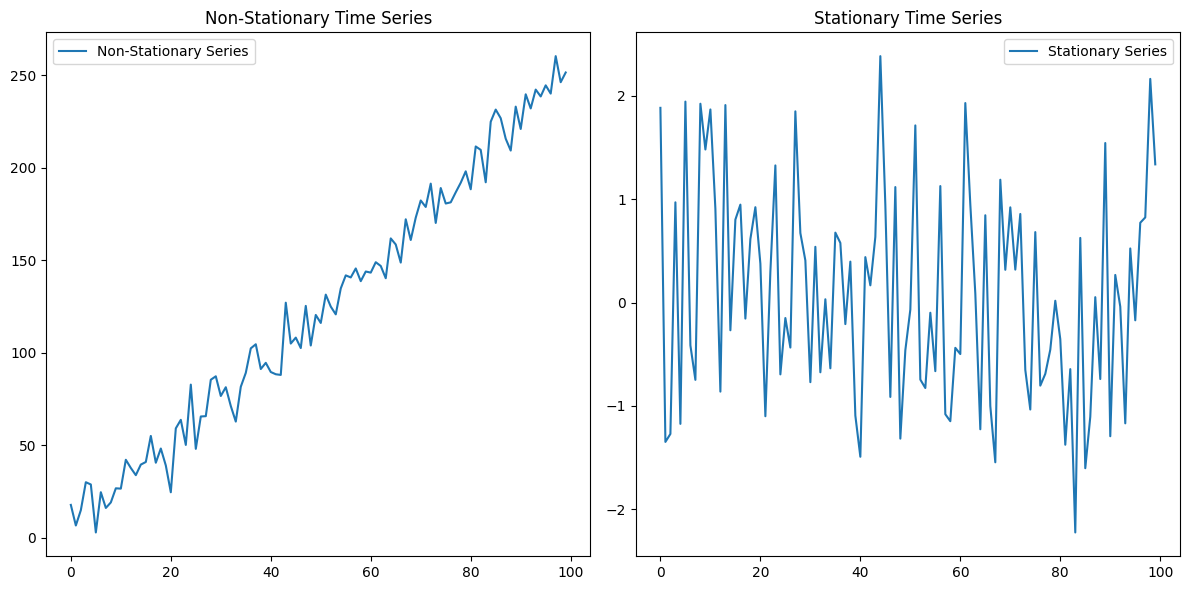

({'ADF Statistic': 2.0116032534256583,
  'p-value': 0.9986878399803543,
  'Critical Values': {'1%': -3.5078527246648834,
   '5%': -2.895382030636155,
   '10%': -2.584823877658872}},
 {'ADF Statistic': -9.942255449227803,
  'p-value': 2.645318003616521e-17,
  'Critical Values': {'1%': -3.498198082189098,
   '5%': -2.891208211860468,
   '10%': -2.5825959973472097}})

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Seed for reproducibility
np.random.seed(0)

# Generate a non-stationary time series (with a trend)
t = np.arange(100)
non_stationary_series = 2.5 * t + np.random.normal(0, 10, 100)

# Generate a stationary time series (white noise)
stationary_series = np.random.normal(0, 1, 100)

# Function to perform ADF Test and return results
def perform_adf_test(series):
    result = adfuller(series)
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

# Perform ADF Test on both series
adf_non_stationary = perform_adf_test(non_stationary_series)
adf_stationary = perform_adf_test(stationary_series)

# Plotting the time series
plt.figure(figsize=(12, 6))

# Non-stationary time series plot
plt.subplot(1, 2, 1)
plt.plot(non_stationary_series, label='Non-Stationary Series')
plt.title('Non-Stationary Time Series')
plt.legend()

# Stationary time series plot
plt.subplot(1, 2, 2)
plt.plot(stationary_series, label='Stationary Series')
plt.title('Stationary Time Series')
plt.legend()

plt.tight_layout()
plt.show()

(adf_non_stationary, adf_stationary)


## Homework

Find a data set that is stationary and a data set the is non-stationary

# Seasonality

Time series decomposition is a technique used to separate a time series into several distinct components, each representing an underlying pattern. There are two primary types of decomposition: Additive and Multiplicative.

Additive Decomposition
In an additive time series model, the components add together to make up the time series. The model is expressed as:

\begin{equation}
    Y_t = T_t + S_t + C_t + \epsilon_t
\end{equation}

where:
- $Y_t$ is the observed time series.
- $T_t$ is the trend component, representing the long-term progression of the series.
- $S_t$ is the seasonal component, showing seasonality (patterns repeating at regular intervals).
- $C_t$ is the cyclic component, representing cycles longer than a year.
- $\epsilon_t$ is the irregular or random component (residual or noise).

<br>
Multiplicative Decomposition
In a multiplicative time series model, the components multiply together. This model is used when the seasonal or cyclic effects increase or decrease proportionally with the level of the trend. The multiplicative model is written as:

\begin{equation}
    Y_t = T_t \times S_t \times C_t \times \epsilon_t
\end{equation}

with the same component definitions as in the additive model. The choice between additive and multiplicative decomposition depends on the nature of the time series and whether the seasonal variations are constant over time (additive) or change proportionally with the trend (multiplicative).


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Load the CO2 dataset
co2 = sm.datasets.co2.load_pandas().data

# Fill missing values
co2.fillna(method='ffill', inplace=True)

# Set the frequency of the time series index to 'W-SAT' (Weekly, Saturday)
co2.index.freq = 'W-SAT'


C:\Users\marsh\AppData\Local\Temp\ipykernel_20048\2227271144.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  co2.fillna(method='ffill', inplace=True)


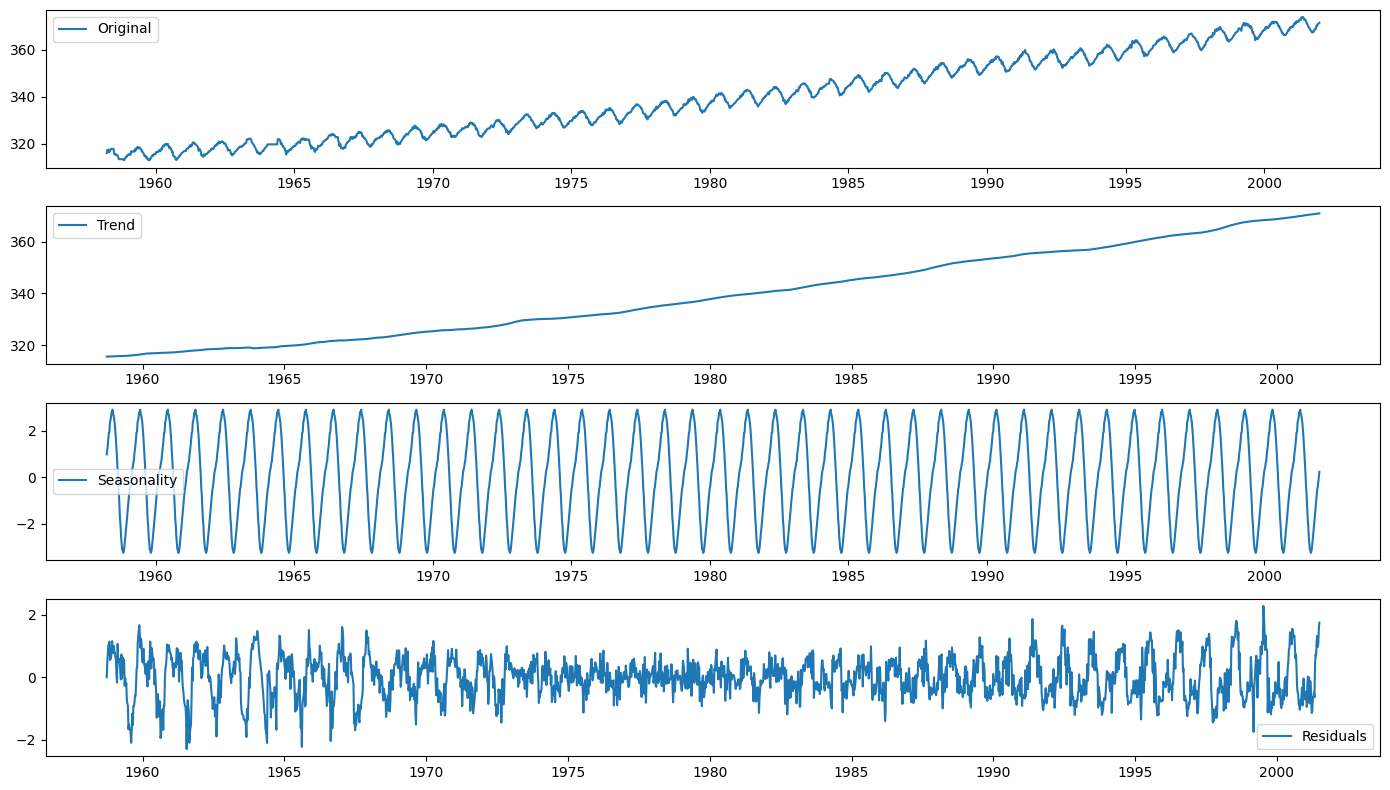

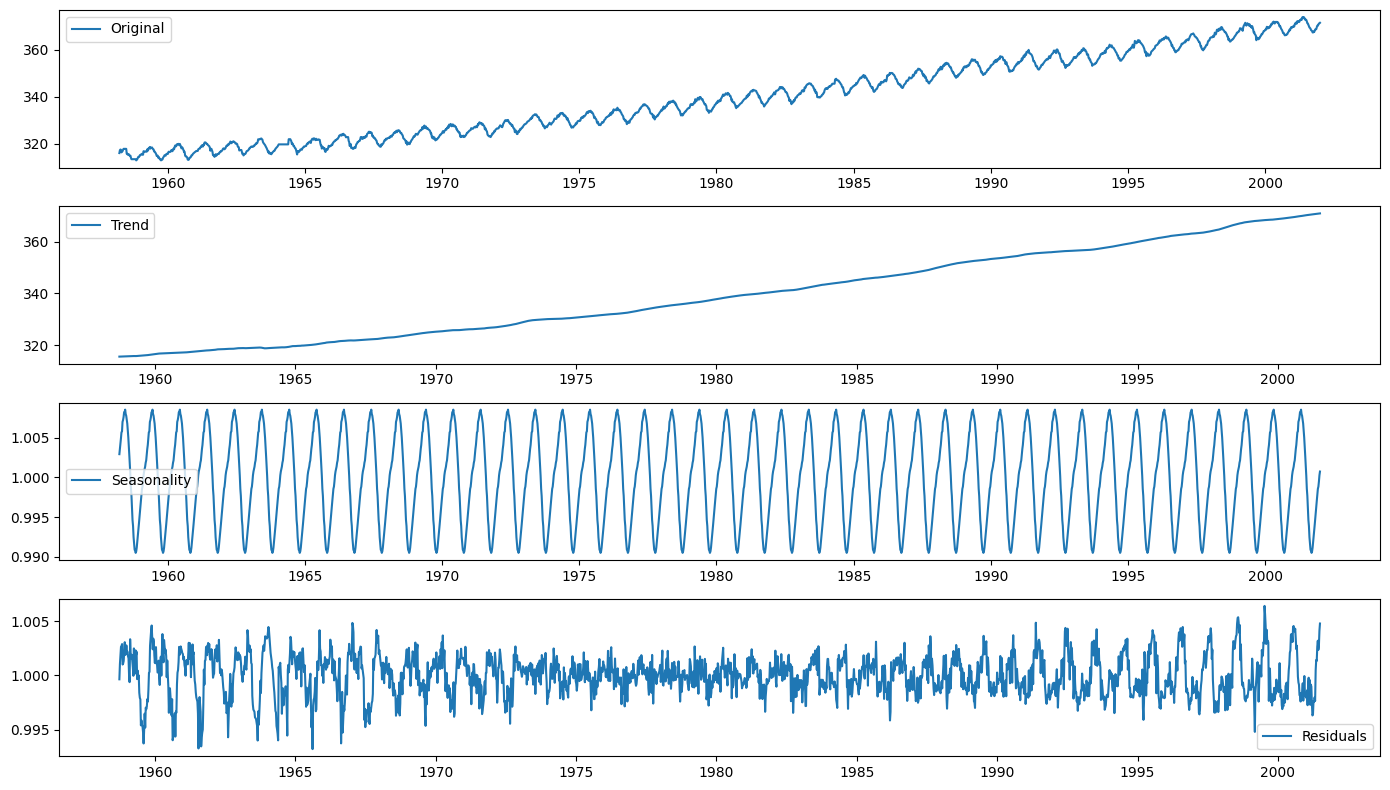

In [20]:
# Perform Additive Decomposition
result_add = seasonal_decompose(co2['co2'], model='additive')

# Perform Multiplicative Decomposition
result_mul = seasonal_decompose(co2['co2'], model='multiplicative')

# Plotting the Additive Decomposition
plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(co2['co2'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result_add.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Plotting the Multiplicative Decomposition
plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(co2['co2'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result_mul.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result_mul.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.show()


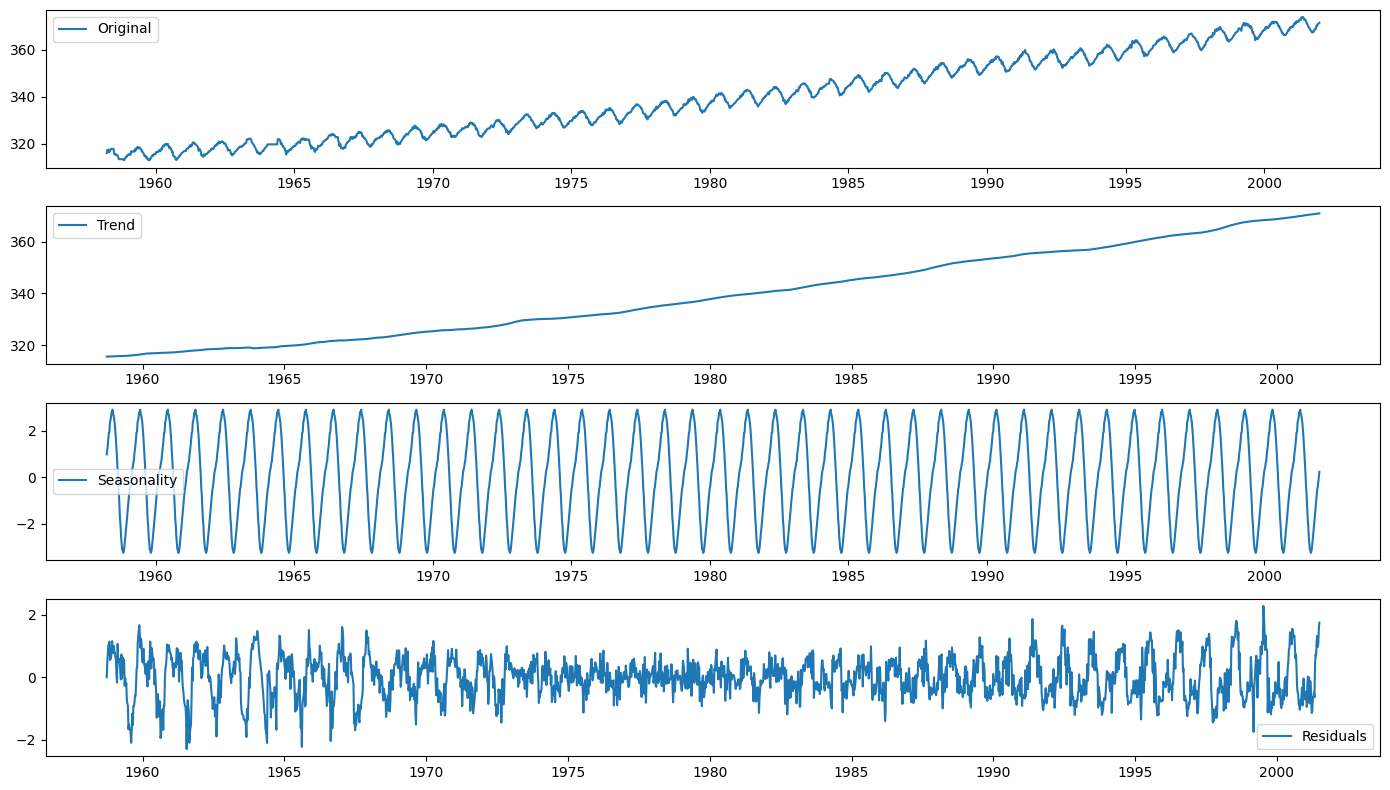

In [4]:

# Perform Additive Decomposition
result_add = seasonal_decompose(co2['co2'], model='additive')


# Plotting the Additive Decomposition
plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(co2['co2'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result_add.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


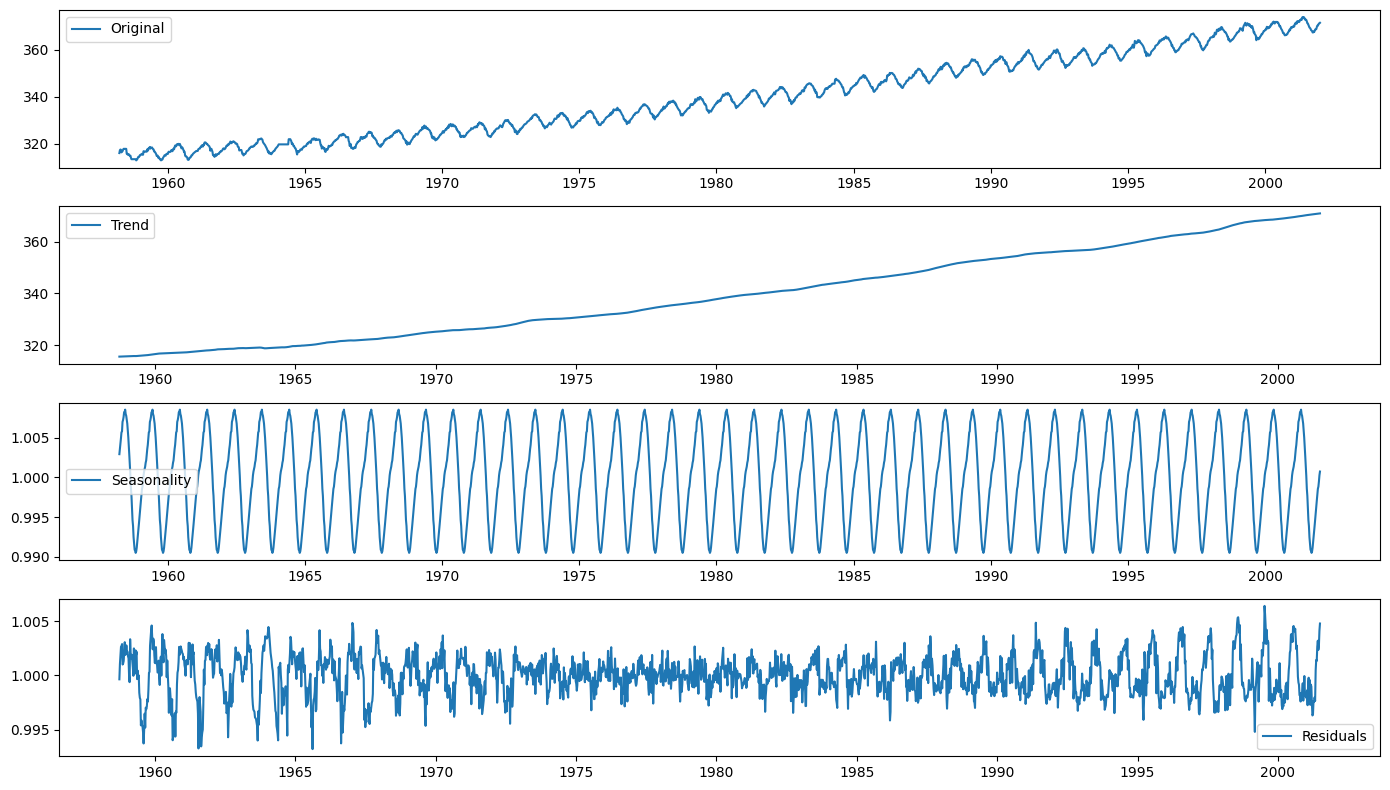

In [21]:

# Perform Multiplicative Decomposition
result_mul = seasonal_decompose(co2['co2'], model='multiplicative')

# Plotting the Multiplicative Decomposition
plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(co2['co2'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result_mul.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result_mul.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



# AutoCorrelation

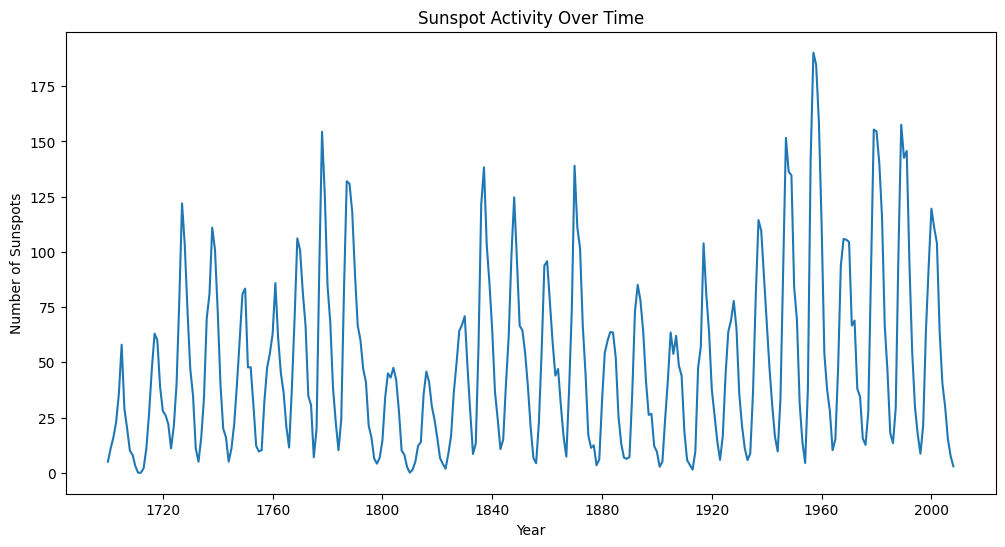

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

# Load the Sunspots dataset
sunspots = sm.datasets.sunspots.load_pandas().data

# Convert 'YEAR' to a datetime object and set as index
sunspots['YEAR'] = pd.to_datetime(sunspots['YEAR'], format='%Y')
sunspots.set_index('YEAR', inplace=True)

# Plotting Sunspot Activity over Time
plt.figure(figsize=(12, 6))
plt.plot(sunspots['SUNACTIVITY'])
plt.title('Sunspot Activity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.show()


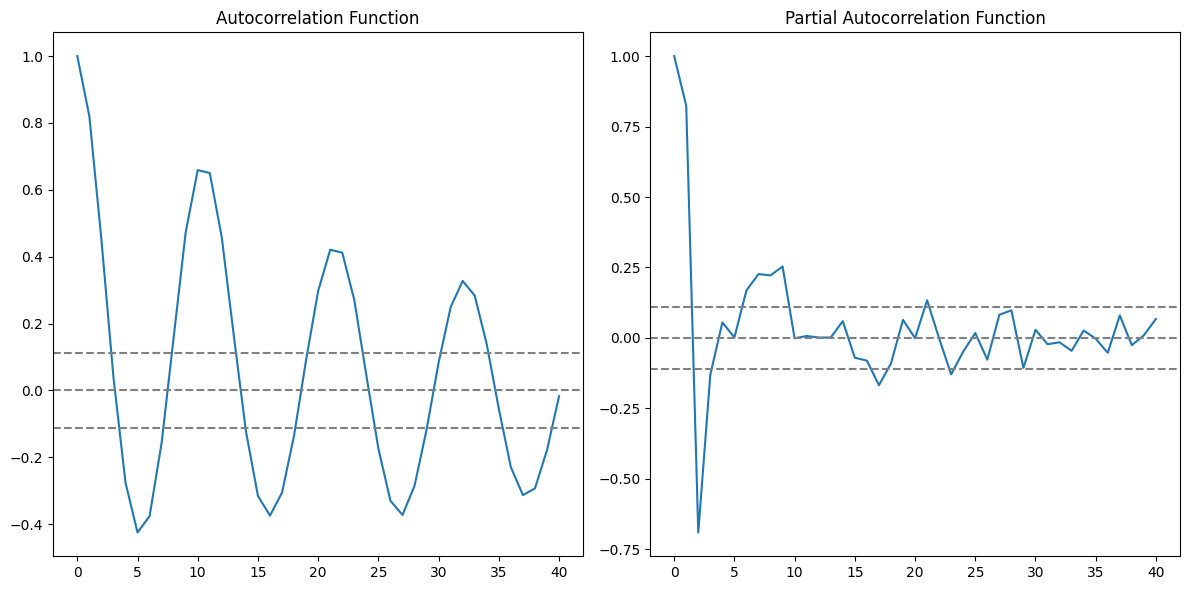

In [ ]:

# ACF and PACF analysis
lag_acf = acf(sunspots['SUNACTIVITY'], nlags=40)
lag_pacf = pacf(sunspots['SUNACTIVITY'], nlags=40, method='ols')

# Plotting ACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sunspots['SUNACTIVITY'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(sunspots['SUNACTIVITY'])), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plotting PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sunspots['SUNACTIVITY'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(sunspots['SUNACTIVITY'])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


# AR

An autoregressive (AR) model is a type of time series model that expresses the current value of a variable as a linear function of its past values and a random error term. Mathematically, an AR(p) model is defined as:

\begin{equation}
  y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t
\end{equation}

where:

- $y_t$ is the value of the time series at time $t$
- $c$ is a constant term
- $\phi_1, \phi_2, \dots, \phi_p$ are the autoregressive coefficients
- $p$ is the order of the AR model
- $\epsilon_t$ is a white noise error term



- **Stationarity:** AR models are often used to model stationary time series, meaning their statistical properties (mean, variance, autocorrelation) remain constant over time.
- **Order:** The order of an AR model (p) determines the number of past values used to predict the current value.
- **Autocorrelation:** AR models capture the autocorrelation structure of a time series, meaning the correlation between a time series and its lagged values.



The parameters of an AR model (c, $\phi_1$, $\phi_2$, ..., $\phi_p$) can be estimated using statistical techniques such as least squares or maximum likelihood estimation. Once the parameters are estimated, the model can be used to generate forecasts of future values.



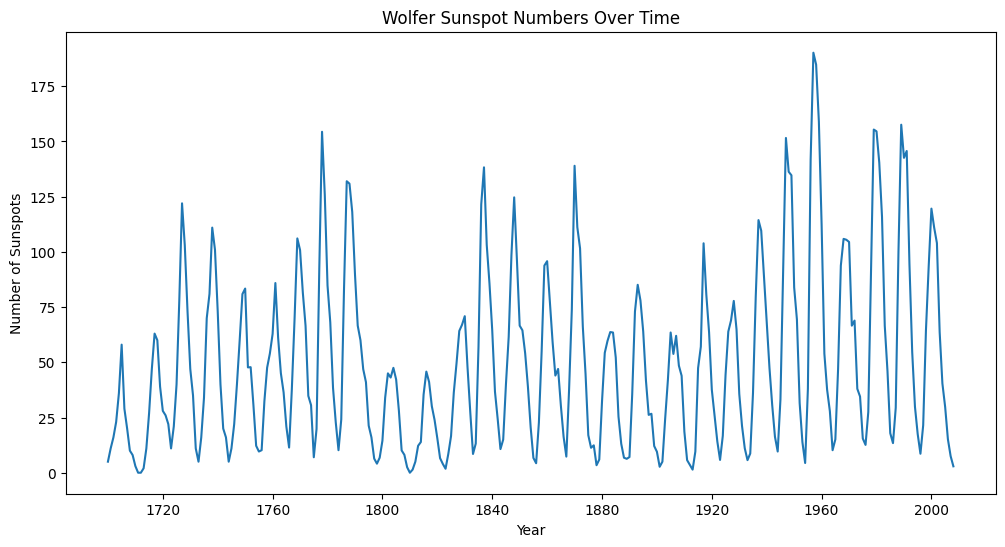

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the Wolfer Sunspot Numbers dataset
sunspots = sm.datasets.sunspots.load_pandas().data

# Convert 'YEAR' to a datetime object and set as index
sunspots['YEAR'] = pd.to_datetime(sunspots['YEAR'], format='%Y')
sunspots.set_index('YEAR', inplace=True)

# Plotting Sunspot Activity over Time
plt.figure(figsize=(12, 6))
plt.plot(sunspots['SUNACTIVITY'])
plt.title('Wolfer Sunspot Numbers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.show()


                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -1304.239
Date:                Mon, 05 Feb 2024   AIC                           2622.478
Time:                        22:09:18   BIC                           2648.611
Sample:                    01-01-1700   HQIC                          2632.926
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7495      3.735     13.320      0.000      42.429      57.070
ar.L1          1.3080      0.053     24.702      0.000       1.204       1.412
ar.L2         -0.4799      0.087     -5.538      0.0

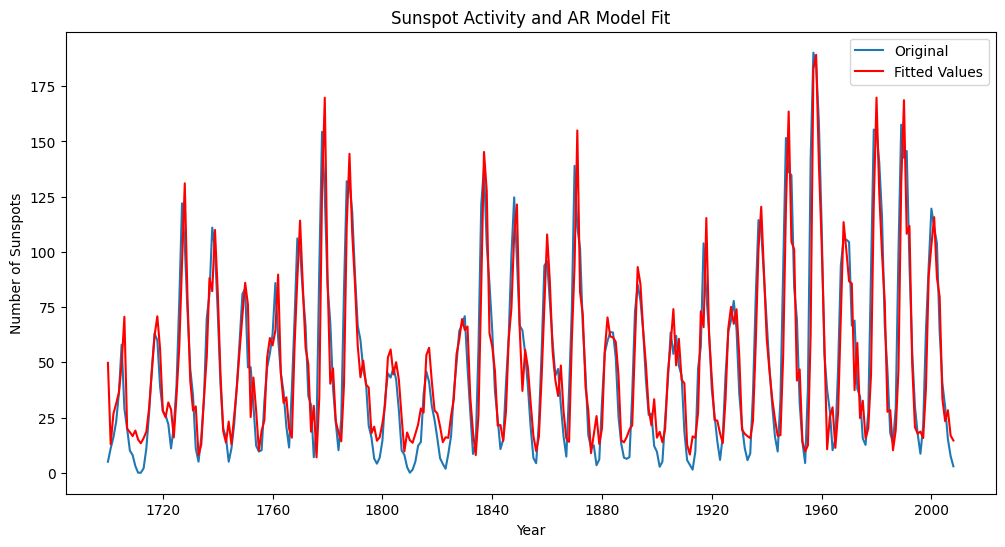

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Load the Wolfer Sunspot Numbers dataset
sunspots = sm.datasets.sunspots.load_pandas().data

# Convert 'YEAR' to a datetime object and set as index
sunspots['YEAR'] = pd.to_datetime(sunspots['YEAR'], format='%Y')
sunspots.set_index('YEAR', inplace=True)

# Explicitly setting the frequency to 'AS' (Annual Start)
sunspots.index.freq = 'AS'

# Choosing the order of the AR model (e.g., p=5)
p = 5
model = ARIMA(sunspots['SUNACTIVITY'], order=(p, 0, 0))

# Fit the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plotting the original series and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(sunspots['SUNACTIVITY'], label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.title('Sunspot Activity and AR Model Fit')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()


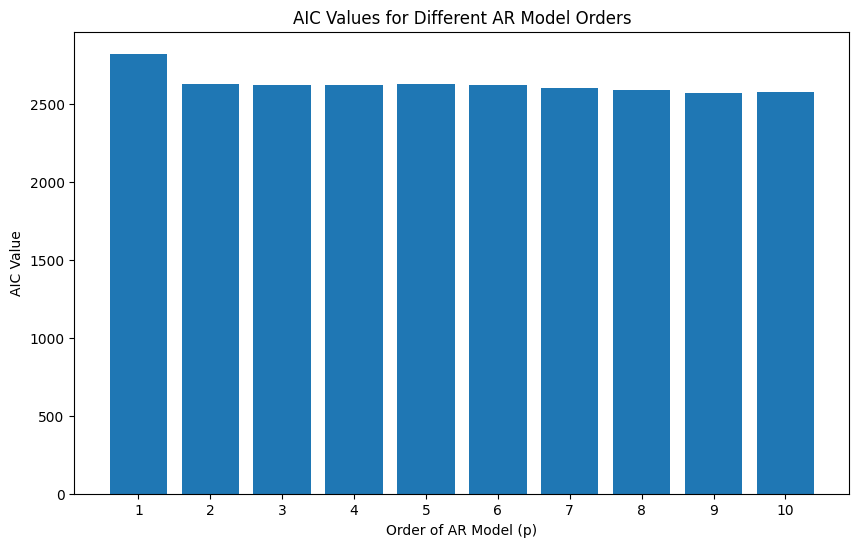

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Load the Wolfer Sunspot Numbers dataset
sunspots = sm.datasets.sunspots.load_pandas().data

# Convert 'YEAR' to a datetime object and set as index
sunspots['YEAR'] = pd.to_datetime(sunspots['YEAR'], format='%Y')
sunspots.set_index('YEAR', inplace=True)

# Explicitly setting the frequency to 'AS' (Annual Start)
sunspots.index.freq = 'AS'

# Initialize a dictionary to store AIC values
aic_values = {}

# Loop through different values of p for the AR model
for p in range(1, 11):  # Trying p from 1 to 10
    model = ARIMA(sunspots['SUNACTIVITY'], order=(p, 0, 0))

    # Fit the model
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model_fit = model.fit()

    # Record the AIC value
    aic_values[p] = model_fit.aic

# Plotting AIC values for different values of p
plt.figure(figsize=(10, 6))
plt.bar(aic_values.keys(), aic_values.values())
plt.xlabel('Order of AR Model (p)')
plt.ylabel('AIC Value')
plt.title('AIC Values for Different AR Model Orders')
plt.xticks(range(1, 11))  # Set x-axis ticks for better readability
plt.show()



# ARMA

## MA



A moving average (MA) model is a type of time series model that expresses the current value of a variable as a linear function of past error terms and a white noise error term. Mathematically, an MA(q) model is defined as:

\begin{equation}
  y_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t
\end{equation}

where:

- $y_t$ is the value of the time series at time $t$
- $\mu$ is the mean of the time series
- $\theta_1, \theta_2, \dots, \theta_q$ are the moving average coefficients
- $q$ is the order of the MA model
- $\epsilon_t$ is a white noise error term

\subsection{Key Properties}

- **Stationarity:** MA models are always stationary, meaning their statistical properties remain constant over time.
- **Order:** The order of an MA model (q) determines the number of past error terms used to predict the current value.
- **Invertibility:** MA models are invertible if their moving average coefficients satisfy certain conditions, ensuring that the model can be expressed as an infinite autoregressive (AR) model.


The parameters of an MA model ($\mu$, $\theta_1$, $\theta_2$, ..., $\theta_q$) can be estimated using statistical techniques such as maximum likelihood estimation. Once the parameters are estimated, the model can be used to generate forecasts of future values.


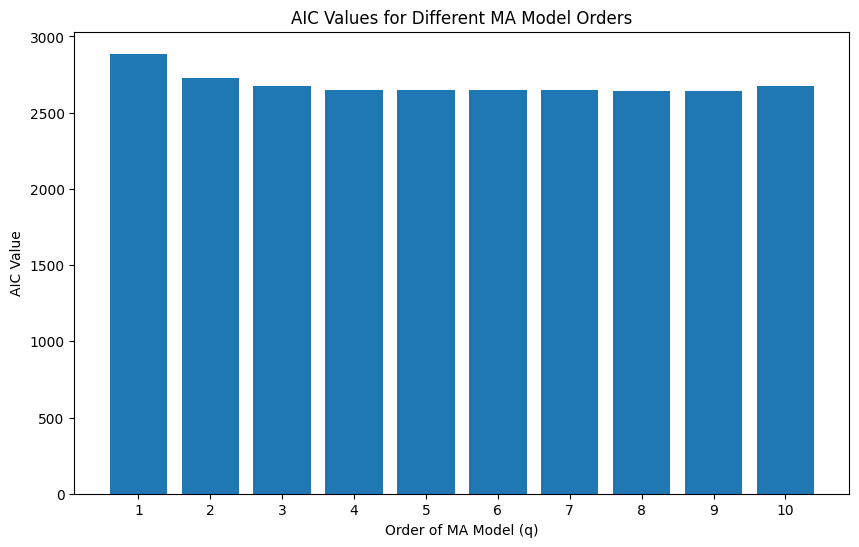

In [10]:
# Initialize a dictionary to store AIC values for MA models
aic_values_ma = {}

# Loop through different values of q for the MA model
for q in range(1, 11):  # Trying q from 1 to 10
    model_ma = ARIMA(sunspots['SUNACTIVITY'], order=(0, 0, q))

    # Fit the model
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model_ma_fit = model_ma.fit()

    # Record the AIC value
    aic_values_ma[q] = model_ma_fit.aic

# Plotting AIC values for different values of q (MA model)
plt.figure(figsize=(10, 6))
plt.bar(aic_values_ma.keys(), aic_values_ma.values())
plt.xlabel('Order of MA Model (q)')
plt.ylabel('AIC Value')
plt.title('AIC Values for Different MA Model Orders')
plt.xticks(range(1, 11))  # Set x-axis ticks for better readability
plt.show()



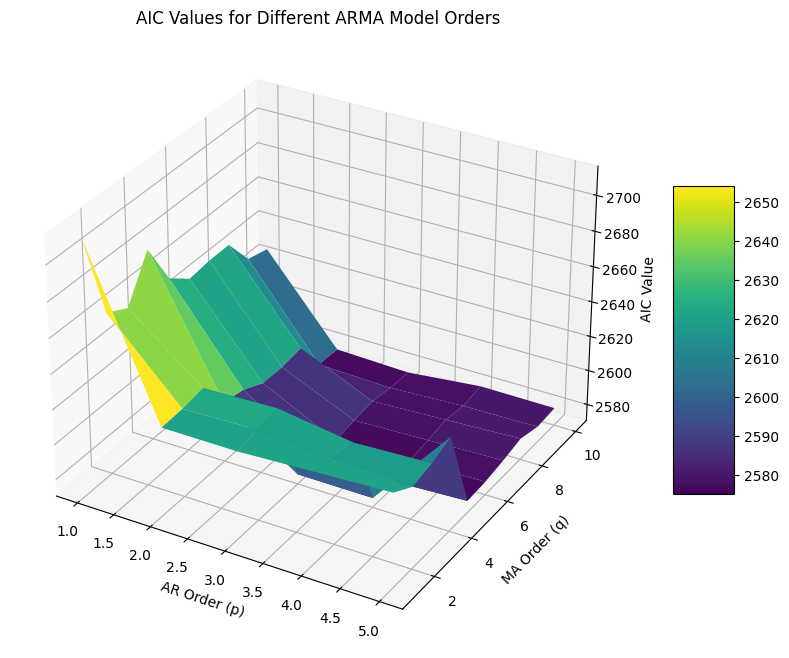

In [11]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Initialize a matrix to store AIC values for ARMA models
max_p, max_q = 5, 10
aic_values_arma = np.zeros((max_p, max_q))

# Loop through different values of p and q for the ARMA model
for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        model_arma = ARIMA(sunspots['SUNACTIVITY'], order=(p, 0, q))

        # Fit the model
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            model_arma_fit = model_arma.fit()

        # Record the AIC value
        aic_values_arma[p-1, q-1] = model_arma_fit.aic

# Preparing data for surface plot
p_values, q_values = np.meshgrid(range(1, max_p + 1), range(1, max_q + 1), indexing='ij')

# Plotting AIC values as a surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(p_values, q_values, aic_values_arma, cmap='viridis')

# Labels and titles
ax.set_xlabel('AR Order (p)')
ax.set_ylabel('MA Order (q)')
ax.set_zlabel('AIC Value')
ax.set_title('AIC Values for Different ARMA Model Orders')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



# ARIMAX

In [12]:
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Download S&P 500 data using yfinance
start = dt.datetime(2010, 1, 1)
end = dt.datetime.now()
sp500 = yf.download('^GSPC', start=start, end=end)

# Download 10-Year Treasury Rate using pandas_datareader
treasury_rate = pdr.get_data_fred('GS10', start=start, end=end)

# Merge the datasets on date
combined_data = sp500[['Close']].join(treasury_rate, how='inner')

# Drop any rows with NaN values
combined_data.dropna(inplace=True)

DATA_DOWNLOAD_FIN_ECON = combined_data

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


In [13]:
import warnings
from statsmodels.tools.sm_exceptions import EstimationWarning, ConvergenceWarning, ValueWarning

# Suppress specific warnings from ARIMA
warnings.filterwarnings("ignore", category=ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                   GS10   No. Observations:                  110
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  -6.127
Date:                Mon, 05 Feb 2024   AIC                             22.253
Time:                        22:15:20   BIC                             35.756
Sample:                             0   HQIC                            27.730
                                - 110                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5822      0.397      6.502      0.000       1.804       3.361
SP500_Returns     0.9656      0.216      4.480      0.000       0.543       1.388
ar.L1             0.9199      0.043     

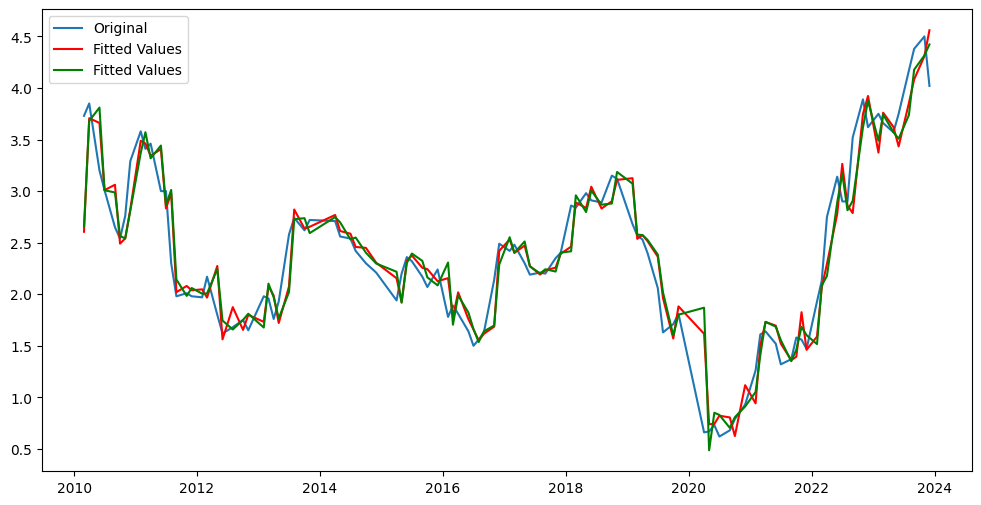

In [18]:

# Download data
combined_data = DATA_DOWNLOAD_FIN_ECON.copy()

# Calculate returns of S&P 500
combined_data['SP500_Returns'] = combined_data['Close'].pct_change()
combined_data.dropna(inplace=True)  # Drop NaN values after calculating returns


# Define exogenous variable (10-Year Treasury Rate)
main = combined_data['GS10']
exog = combined_data['SP500_Returns']

# Fit an ARIMAX model (using ARIMA from statsmodels as it can handle exogenous variables)
model1 = ARIMA(main, exog=exog, order=(1, 0, 1))
model2 = ARIMA(main, order=(1, 0, 1))
arimax_results1 = model1.fit()
arimax_results2 = model2.fit()

# Print the model summary
print(arimax_results1.summary())
print(arimax_results2.summary())

# Plot the original data and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(main, label='Original')
plt.plot(arimax_results1.fittedvalues, color='red', label='Fitted Values')
plt.plot(arimax_results2.fittedvalues, color='green', label='Fitted Values')
plt.title('')
plt.legend()
plt.show()



## ARIMA

# SARIMAX

SARIMAX Models: Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors

SARIMAX models are a powerful class of time series models that combine ARIMA models with seasonal components and exogenous regressors. They are designed to handle a wide range of time series patterns, including seasonality, trends, non-stationarity, and external influences.


The general form of a SARIMAX(p,d,q)(P,D,Q)m model is given by:

\begin{equation}
\Phi(B)\phi(B^m)(1-B)^d(1-B^m)^D y_t = \Theta(B)\theta(B^m)x_t + \epsilon_t
\end{equation}

where:

- $y_t$ is the observed time series
- $x_t$ is a vector of exogenous regressors
- $B$ is the backshift operator (i.e., $B^k y_t = y_{t-k}$)
- $\Phi(B)$ and $\Theta(B)$ are polynomials in $B$ of order $P$ and $Q$, respectively, representing the seasonal AR and MA components
- $\phi(B^m)$ and $\theta(B^m)$ are polynomials in $B^m$ of order $p$ and $q$, respectively, representing the non-seasonal AR and MA components
- $d$ and $D$ are the non-seasonal and seasonal differencing orders
- $m$ is the seasonal period
- $\epsilon_t$ is a white noise error term


- **ARIMA Components:** SARIMAX models incorporate the basic structure of ARIMA models, including autoregressive (AR), moving average (MA), and differencing components to model trend and seasonality.
- **Seasonal Components:** They model seasonality using seasonal AR and MA terms, as well as seasonal differencing.
- **Exogenous Regressors:** They can incorporate exogenous variables (e.g., external factors influencing the time series) to improve model accuracy and capture external influences.


Parameter Estimation and Forecasting

Parameters of SARIMAX models are typically estimated using maximum likelihood estimation. Once estimated, the model can be used to generate forecasts of future values, taking into account seasonality, trends, and external influences.


## Automatic

[*********************100%%**********************]  1 of 1 completed


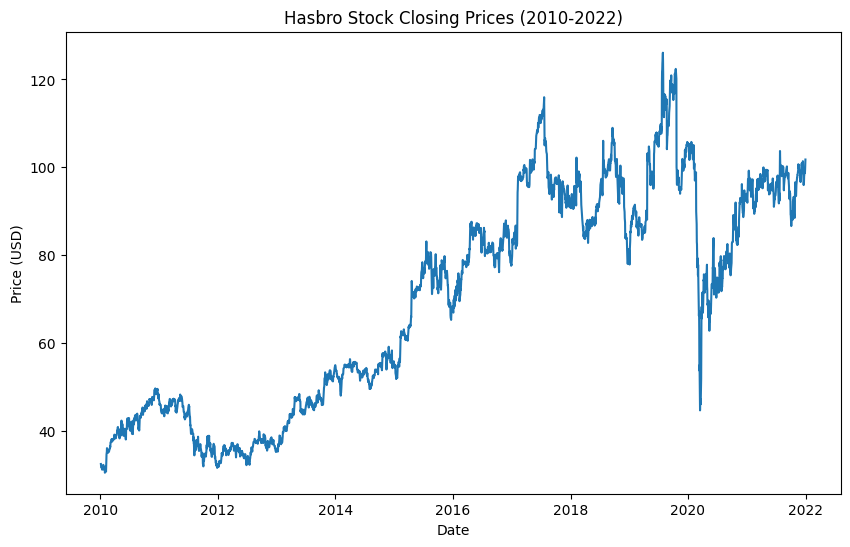

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Hasbro stock data
hasbro = yf.download('HAS', start='2010-01-01', end='2022-01-01')

# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(hasbro['Close'])
plt.title('Hasbro Stock Closing Prices (2010-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()



In [21]:
pip install pmdarima -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.3 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=10536.175, Time=9.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10528.610, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10530.786, Time=1.87 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=10530.680, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10527.441, Time=0.08 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=10529.323, Time=0.95 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=10529.216, Time=0.83 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=10529.379, Time=3.35 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=10530.113, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=10530.114, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=10532.120, Time=0.56 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 19.494 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observa

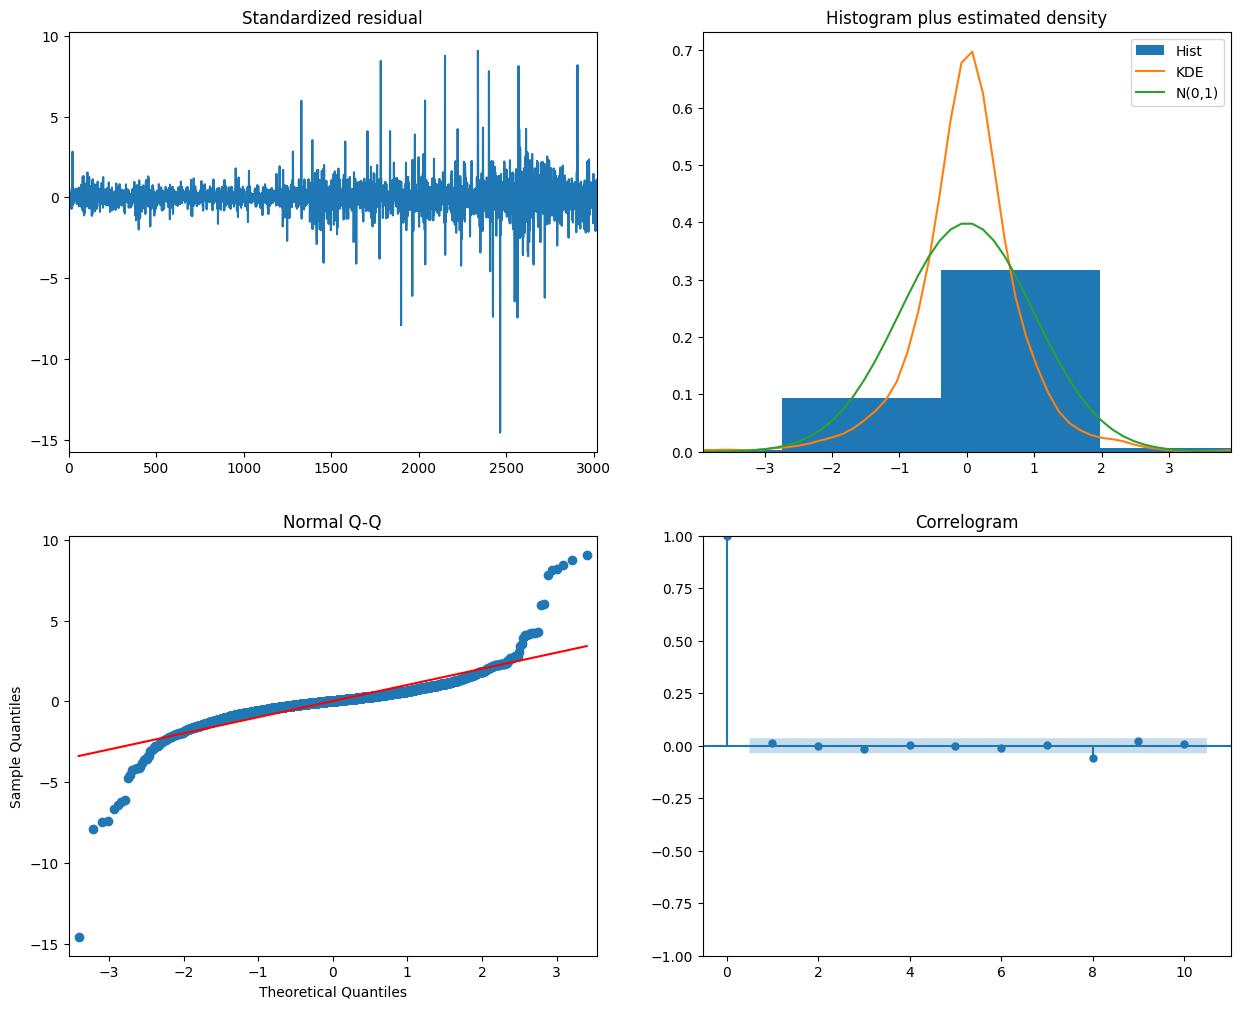

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Download Hasbro stock data
hasbro_data = yf.download('HAS', start='2010-01-01', end='2022-01-01')

# Using only the closing prices
hasbro_close = hasbro_data['Close']

# Auto ARIMA to find the best SARIMA model
best_model = auto_arima(hasbro_close, seasonal=True, m=12,
                        trace=True, error_action='ignore', suppress_warnings=True)

# Best model summary
print(best_model.summary())

# Plotting the diagnostics
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()



## Manual

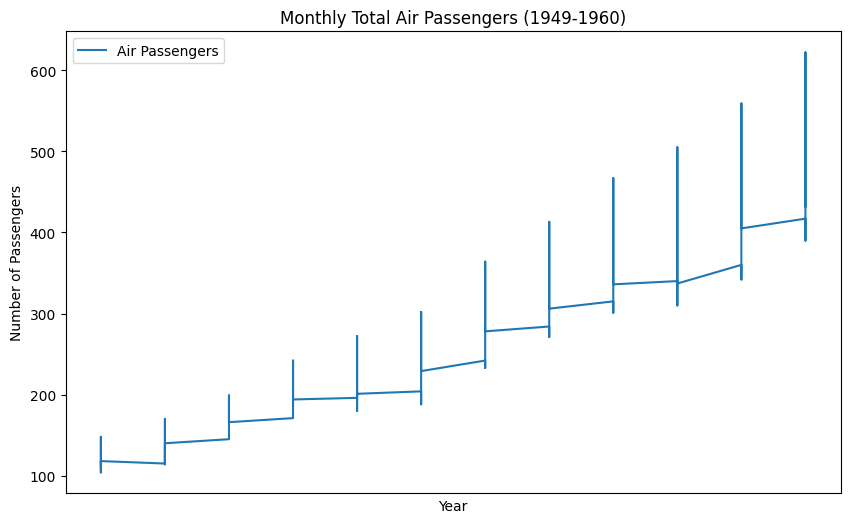

In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the Airline Passengers dataset
data = sm.datasets.get_rdataset("AirPassengers").data
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d')
data.set_index('time', inplace=True)
data.rename(columns={'value': 'Passengers'}, inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Monthly Total Air Passengers (1949-1960)')
plt.legend()
plt.show()


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Mon, 05 Feb 2024   AIC                           1022.299
Time:                                    22:17:23   BIC                           1036.675
Sample:                                         0   HQIC                          1028.140
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

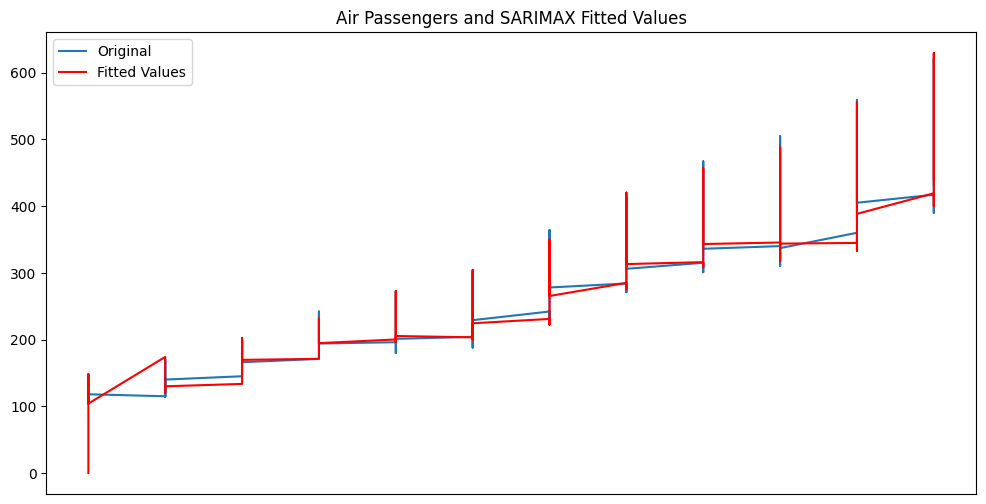

In [24]:


# Fitting a SARIMAX model
sarimax_model = SARIMAX(data['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = sarimax_model.fit(disp=False)

# Print the model summary
print(sarimax_results.summary())

# Plot the original data and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original')
plt.plot(sarimax_results.fittedvalues, color='red', label='Fitted Values')
plt.title('Air Passengers and SARIMAX Fitted Values')
plt.legend()
plt.show()



# EWMA



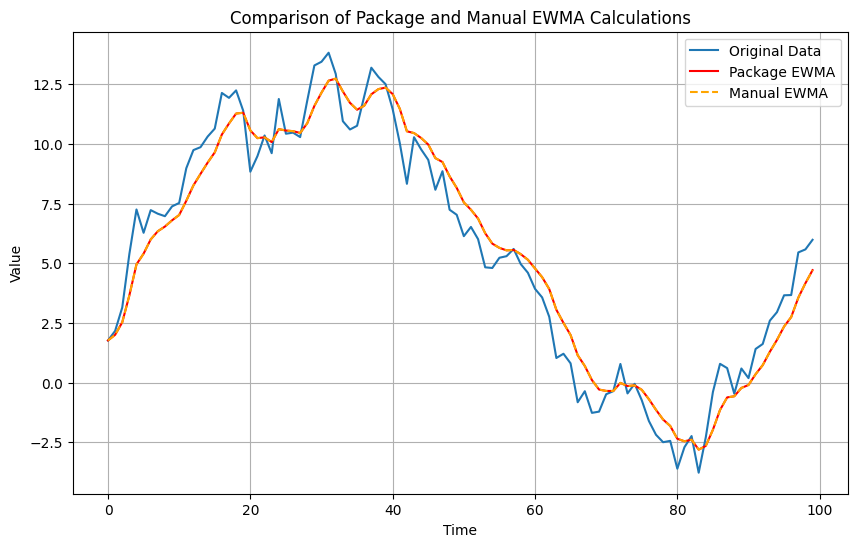

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating random data again
np.random.seed(0)
data = np.random.randn(100).cumsum()
df = pd.DataFrame(data, columns=['Value'])

# Function for manual calculation of EWMA
def manual_ewma(series, alpha):
    result = []
    for t in range(len(series)):
        weights = np.array([(1 - alpha) ** (t - i) for i in range(t + 1)])
        weighted_average = np.sum(weights * series[:t+1]) / np.sum(weights)
        result.append(weighted_average)
    return np.array(result)

# Smoothing factor
alpha = 0.3

# Calculating EWMA using pandas
df['EWMA'] = df['Value'].ewm(alpha=alpha).mean()

# Applying the manual EWMA calculation
df['Manual_EWMA'] = manual_ewma(df['Value'], alpha)

# Plotting the original data, package EWMA, and manual EWMA
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original Data')
plt.plot(df['EWMA'], label='Package EWMA', color='red')
plt.plot(df['Manual_EWMA'], label='Manual EWMA', color='orange', linestyle='dashed')
plt.title('Comparison of Package and Manual EWMA Calculations')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Holt Winters

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [27]:
url = 'https://raw.githubusercontent.com/DavidRomoff/QRM/main/international-airline-passengers.csv'
DOWNLOAD = pd.read_csv(url,index_col='Month', parse_dates=True)
df = DOWNLOAD.copy()
df.index.name = 'month'
df.columns = ['passengers']
df = df.dropna()
df.index.freq = 'MS'
CLEAN = df.copy()

<Axes: xlabel='month'>

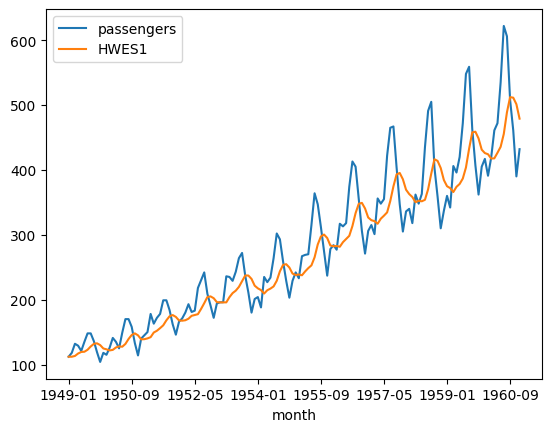

In [28]:
df['HWES1'] = SimpleExpSmoothing(df['passengers']).fit(smoothing_level=0.2,optimized=False).fittedvalues
df.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='month'>

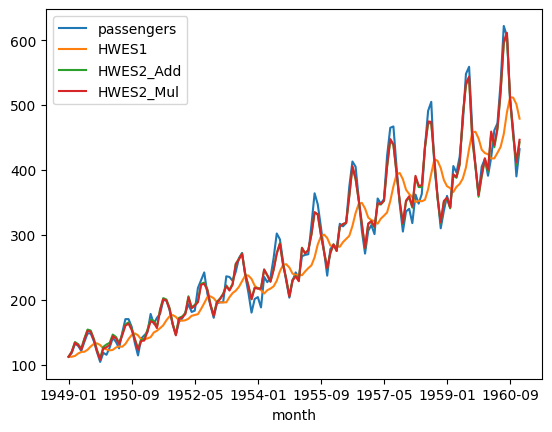

In [29]:
df['HWES2_Add'] = ExponentialSmoothing(df['passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['HWES2_Mul'] = ExponentialSmoothing(df['passengers'],trend='mul',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='month'>

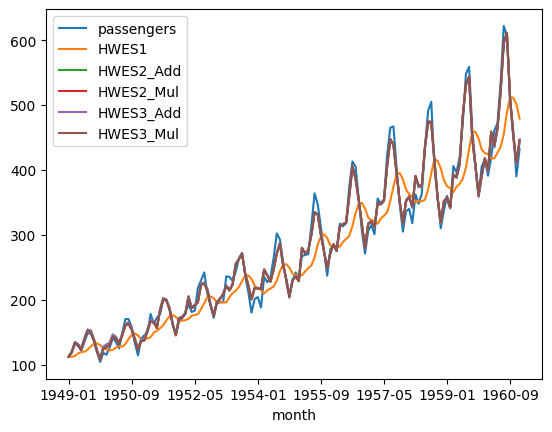

In [30]:
df['HWES3_Add'] = ExponentialSmoothing(df['passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['HWES3_Mul'] = ExponentialSmoothing(df['passengers'],trend='mul',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.plot()

In [31]:
df = CLEAN.copy()
df_train = df[:-24]
df_test_ = df[-24:]

In [32]:
model = ExponentialSmoothing(df_train['passengers'],trend='mul',seasonal='add',seasonal_periods=12).fit()
df_forecast = model.forecast(24)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


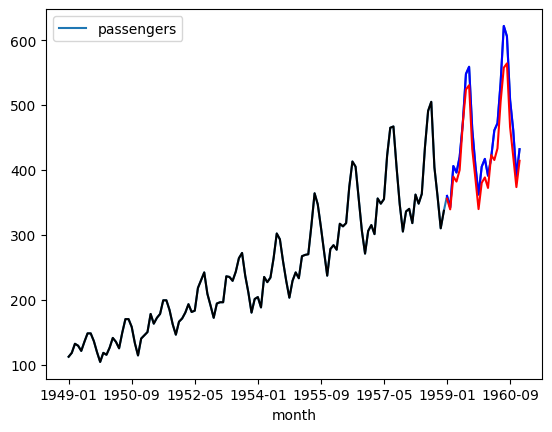

In [33]:
df.plot()
plt.plot(df_train.index,df_train['passengers'], label='Train',color='black')
plt.plot(df_test_.index,df_test_['passengers'], label='Test', color='blue')
plt.plot(df_test_.index,df_forecast, label='Test', color='red')


# GARCH

Generalized Autoregressive Conditional Heteroskedasticity (GARCH) Models

A GARCH model is a statistical model used to analyze time series data that exhibits time-varying volatility, often observed in financial markets. It captures the clustering of volatility, where large changes tend to be followed by large changes, and small changes tend to be followed by small changes.


A GARCH(p,q) model is defined by two equations:

1. **Conditional Mean Equation:**
   \begin{equation}
      y_t = \mu + \epsilon_t
   \end{equation}
   where $y_t$ is the observed time series, $\mu$ is the mean, and $\epsilon_t$ is the error term.

2. **Conditional Variance Equation:**
   \begin{equation}
      \sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
   \end{equation}
   where $\sigma_t^2$ is the conditional variance at time $t$, $\omega$ is a constant, $\alpha_1, \dots, \alpha_p$ are the ARCH coefficients, and $\beta_1, \dots, \beta_q$ are the GARCH coefficients.



Key Properties

- **Volatility Clustering:** GARCH models capture the phenomenon of volatility clustering, where periods of high volatility are followed by periods of high volatility, and periods of low volatility are followed by periods of low volatility.
- **Non-Stationary Variance:** The variance of a GARCH process is not constant over time, but it is still a covariance stationary process.
- **Order:** The order of a GARCH model (p,q) determines the number of past squared errors and past conditional variances used to model the current conditional variance.



The parameters of a GARCH model can be estimated using maximum likelihood estimation. Once the parameters are estimated, the model can be used to generate forecasts of future values and conditional variances.


## Data

In [34]:
DATA_DOWNLOAD = yf.download('^GSPC', start='2010-01-01', end='2020-12-31')

[*********************100%%**********************]  1 of 1 completed


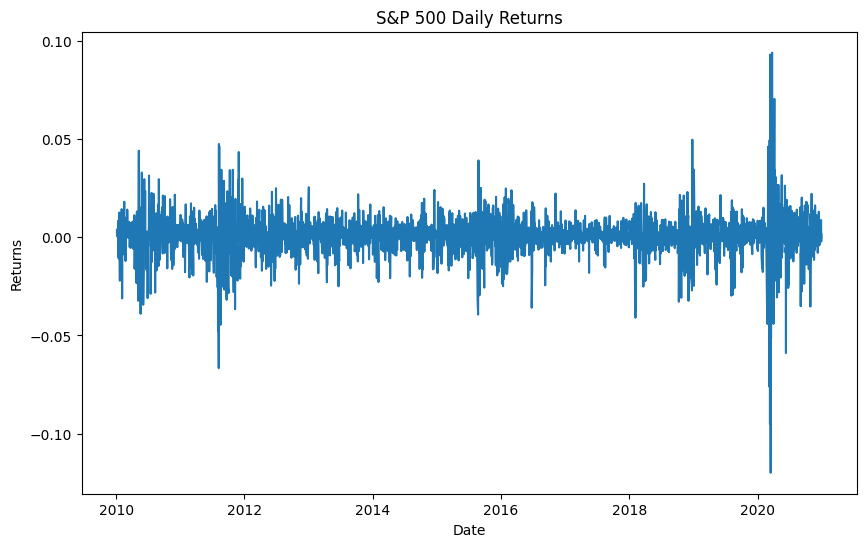

In [35]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download S&P 500 data
data = DATA_DOWNLOAD.copy()

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Drop any NaN values
data.dropna(inplace=True)

# Plot the returns
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'])
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()


## GARCH(1,1)

In [36]:
pip install arch -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 10.5 MB/s eta 0:00:00


Iteration:      5,   Func. Count:     41,   Neg. LLF: 3521.6536325276415
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3453.0054841343654
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3453.01
Distribution:                  Normal   AIC:                           6914.01
Method:            Maximum Likelihood   BIC:                           6937.71
                                        No. Observations:                 2767
Date:                Mon, Feb 05 2024   Df Residuals:                     2766
Time:                        22:19:42   Df Model:                            1
        

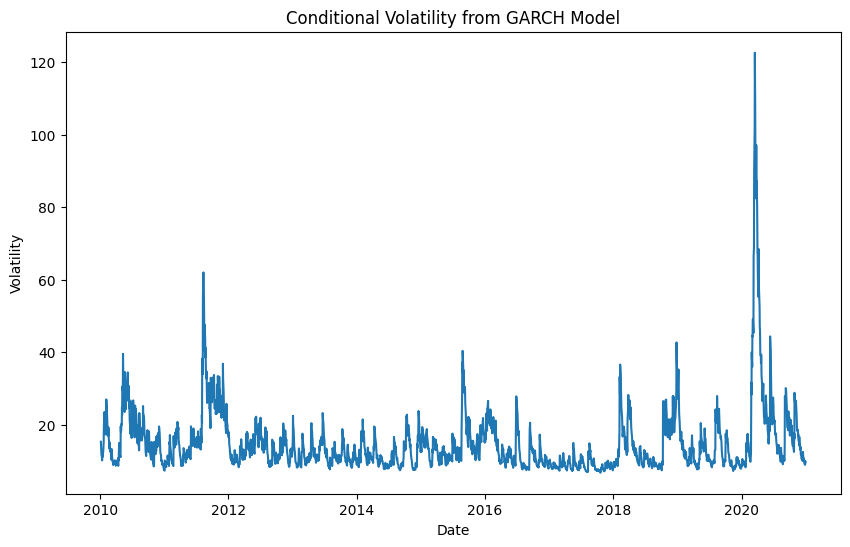

In [38]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# Download S&P 500 data
data = DATA_DOWNLOAD.copy()
trading_days = 252;

# Calculate daily returns and drop NaN values
data['Returns'] = data['Close'].pct_change() * 100
data = data.dropna()

# Fit a GARCH(1,1) model
garch_model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(update_freq=5)

# Print the summary of the model fit
print(garch_fit.summary())

# Plot the model's conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility * np.sqrt(trading_days))
plt.title('Conditional Volatility from GARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


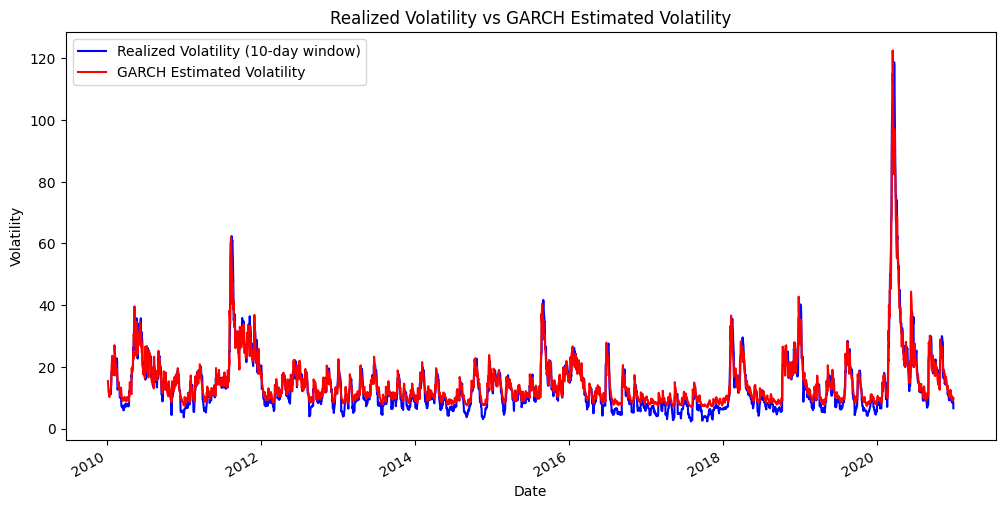

In [39]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt
import numpy as np

# Parameters
windowSize = 10
trading_days = 252  # Typically, there are 252 trading days in a year

# Download S&P 500 data
data = DATA_DOWNLOAD.copy()

# Calculate daily returns and drop NaN values
data['Returns'] = data['Close'].pct_change() * 100
data = data.dropna()

# Fit a GARCH(1,1) model
garch_model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(update_freq=5, disp='off')

# Calculate realized volatility (rolling standard deviation of returns)
data['RealizedVol'] = data['Returns'].rolling(window=windowSize).std() * np.sqrt(trading_days)

# GARCH conditional volatility
data['GARCH_Vol'] = garch_fit.conditional_volatility * np.sqrt(trading_days)

# Plotting
plt.figure(figsize=(12, 6))
data['RealizedVol'].plot(label='Realized Volatility (10-day window)', color='blue')
data['GARCH_Vol'].plot(label='GARCH Estimated Volatility', color='red')
plt.title('Realized Volatility vs GARCH Estimated Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [40]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Download S&P 500 data
data = DATA_DOWNLOAD.copy()

# Calculate daily returns and drop NaN values
data['Returns'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)

# Fit a GARCH(1,1) model
garch_model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(update_freq=5, disp='off')

def plot_realized_vs_garch(windowSize):
    # Calculate realized volatility
    trading_days = 252
    data['RealizedVol'] = data['Returns'].rolling(window=windowSize).std() * np.sqrt(trading_days)

    # GARCH conditional volatility
    data['GARCH_Vol'] = garch_fit.conditional_volatility * np.sqrt(trading_days)

    # Plotting
    plt.figure(figsize=(12, 6))
    data['RealizedVol'].plot(label=f'Realized Volatility ({windowSize}-day window)', color='blue')
    data['GARCH_Vol'].plot(label='GARCH Estimated Volatility', color='red')
    plt.title('Realized Volatility vs GARCH Estimated Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()

# Create interactive widget
window_size_slider = widgets.IntSlider(value=2, min=2, max=30, step=1, description='Window Size:', continuous_update=False)
widgets.interactive(plot_realized_vs_garch, windowSize=window_size_slider)


interactive(children=(IntSlider(value=2, continuous_update=False, description='Window Size:', max=30, min=2), …

## GARCH(p,q)

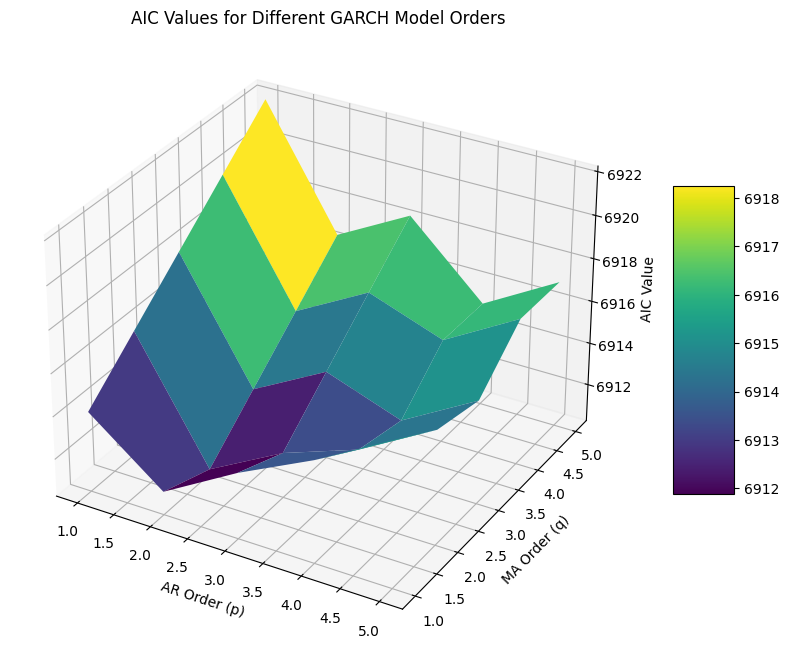

In [41]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Download S&P 500 data
data = DATA_DOWNLOAD.copy()

# Calculate daily returns and drop NaN values
data['Returns'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)

# Initialize a matrix to store AIC values for GARCH models
max_p, max_q = 5, 5  # Setting max values for p and q
aic_values_garch = np.zeros((max_p, max_q))

# Loop through different values of p and q for the GARCH model

best_aic = np.inf
best_order = (0, 0)
for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        model_garch = arch_model(data['Returns'], vol='Garch', p=p, q=q)
        model_garch_fit = model_garch.fit(disp='off')
        aic = model_garch_fit.aic
        aic_values_garch[p-1, q-1] = aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)

# Preparing data for surface plot
p_values, q_values = np.meshgrid(range(1, max_p + 1), range(1, max_q + 1), indexing='ij')

# Plotting AIC values as a surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(p_values, q_values, aic_values_garch, cmap='viridis')

# Labels and titles
ax.set_xlabel('AR Order (p)')
ax.set_ylabel('MA Order (q)')
ax.set_zlabel('AIC Value')
ax.set_title('AIC Values for Different GARCH Model Orders')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



In [42]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Download S&P 500 data
data = DATA_DOWNLOAD.copy()

# Calculate daily returns and drop NaN values
data['Returns'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)

# Initialize a matrix to store AIC values for GARCH models
max_p, max_q = 4, 4  # Setting max values for p and q
aic_values_garch = np.zeros((max_p, max_q))

# Loop through different values of p and q for the GARCH model
best_aic = np.inf
best_order = (0, 0)
for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        model_garch = arch_model(data['Returns'], vol='Garch', p=p, q=q)
        model_garch_fit = model_garch.fit(disp='off')
        aic = model_garch_fit.aic
        aic_values_garch[p-1, q-1] = aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)

# Fit the best GARCH model
best_model = arch_model(data['Returns'], vol='Garch', p=best_order[0], q=best_order[1])
best_model_fit = best_model.fit(disp='off')

def plot_realized_vs_garch(windowSize):
    # Calculate realized volatility
    trading_days = 252
    data['RealizedVol'] = data['Returns'].rolling(window=windowSize).std() * np.sqrt(trading_days)

    # GARCH conditional volatility from the best model
    data['GARCH_Vol'] = best_model_fit.conditional_volatility * np.sqrt(trading_days)

    # Plotting
    plt.figure(figsize=(12, 6))
    data['RealizedVol'].plot(label=f'Realized Volatility ({windowSize}-day window)', color='blue')
    data['GARCH_Vol'].plot(label='GARCH Estimated Volatility (Best Model)', color='red')
    plt.title('Realized Volatility vs GARCH Estimated Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()

# Create interactive widget
window_size_slider = widgets.IntSlider(value=2, min=2, max=30, step=1, description='Window Size:', continuous_update=False)
widgets.interactive(plot_realized_vs_garch, windowSize=window_size_slider)



interactive(children=(IntSlider(value=2, continuous_update=False, description='Window Size:', max=30, min=2), …

## ARIMA GARCH

In [ ]:
pip install pandas-datareader -q


In [ ]:
start = dt.datetime(1990, 1, 1)
end = dt.datetime.now()
DATA_DOWNLOAD_ECON = cpi_data = pdr.get_data_fred('CPIAUCSL', start, end)

<Axes: title={'center': 'Consumer Price Index (CPI) Over Time'}, xlabel='DATE'>

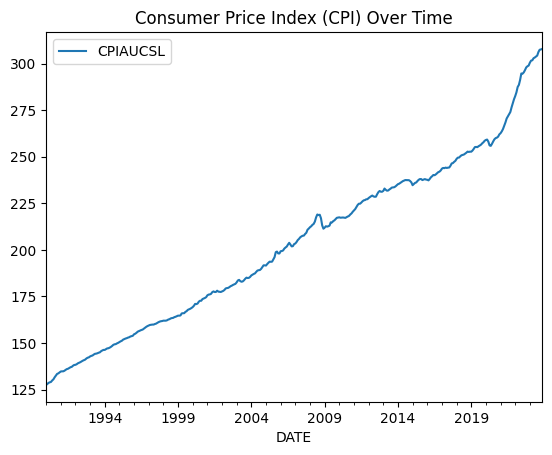

In [ ]:
import pandas_datareader as pdr
import datetime as dt


# Download Consumer Price Index (CPI) data from FRED
cpi_data = DATA_DOWNLOAD_ECON.copy()

# Plotting the CPI data
cpi_data.plot(title='Consumer Price Index (CPI) Over Time')


Text(0, 0.5, 'Returns')

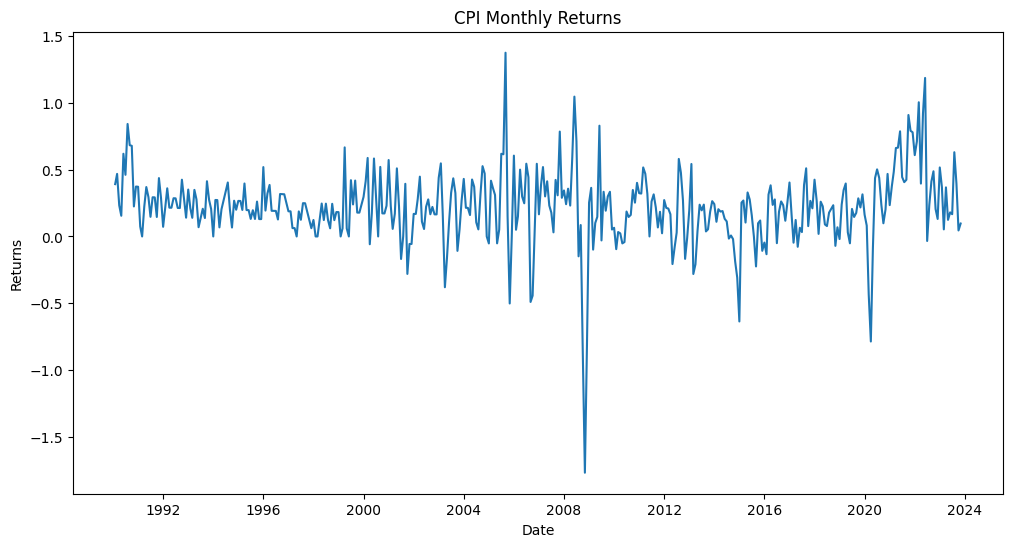

In [ ]:
import pandas_datareader as pdr
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt

# Download Consumer Price Index (CPI) data from FRED
cpi_data = DATA_DOWNLOAD_ECON.copy()

# Set the frequency to 'MS' (Month Start)
cpi_data.index.freq = 'MS'

# Calculate monthly returns from CPI data
cpi_data['Returns'] = cpi_data['CPIAUCSL'].pct_change() * 100
cpi_data.dropna(inplace=True)


# Plot the CPI returns
plt.figure(figsize=(12, 6))
plt.plot(cpi_data['Returns'], label='CPI Monthly Returns')
plt.title('CPI Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')


# XGARCH

## EGARCH

In [ ]:
DATA_DOWNLOAD = yf.download('^GSPC', start='2010-01-01', end='2020-12-31')

[*********************100%%**********************]  1 of 1 completed


Iteration:      5,   Func. Count:     41,   Neg. LLF: 3464.85745513408
Iteration:     10,   Func. Count:     66,   Neg. LLF: 3464.7751635003215
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3464.7751635003215
            Iterations: 11
            Function evaluations: 70
            Gradient evaluations: 11
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3464.78
Distribution:                  Normal   AIC:                           6937.55
Method:            Maximum Likelihood   BIC:                           6961.25
                                        No. Observations:                 2767
Date:                Wed, Jan 03 2024   Df Residuals:                     2766
Time:         

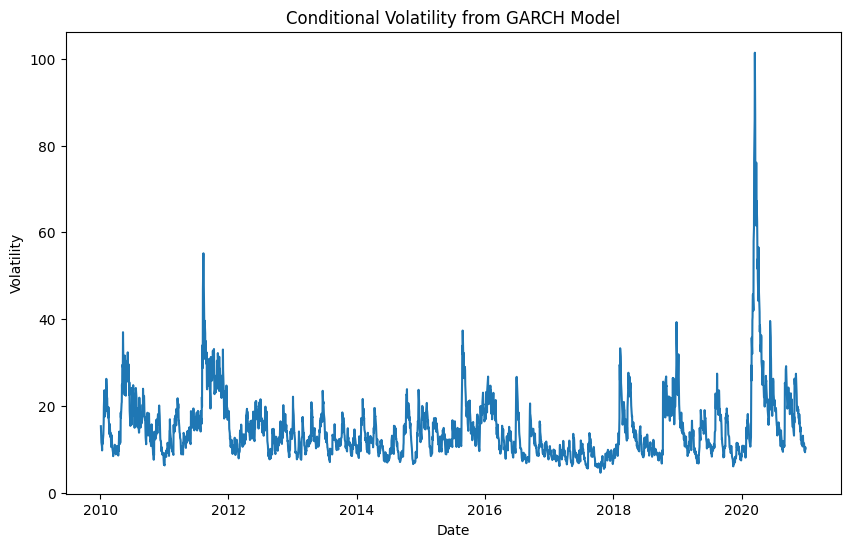

In [ ]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# Download S&P 500 data
data = DATA_DOWNLOAD.copy()


# Calculate daily returns and drop NaN values
data['Returns'] = data['Close'].pct_change() * 100
data = data.dropna()

# Fit a GARCH(1,1) model
garch_model = arch_model(data['Returns'], vol='EGarch', p=1, q=1)
garch_fit = garch_model.fit(update_freq=5)

# Print the summary of the model fit
print(garch_fit.summary())

# Plot the model's conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility * np.sqrt(trading_days))
plt.title('Conditional Volatility from GARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


## TGARCH

Iteration:      5,   Func. Count:     47,   Neg. LLF: 23623.444444544595
Iteration:     10,   Func. Count:     79,   Neg. LLF: 3396.6157980209114
Iteration:     15,   Func. Count:    109,   Neg. LLF: 3396.615759665908
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3396.615759665738
            Iterations: 15
            Function evaluations: 109
            Gradient evaluations: 15
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3396.62
Distribution:                  Normal   AIC:                           6803.23
Method:            Maximum Likelihood   BIC:                           6832.86
                                        No. Observations:                 2767
Date:              

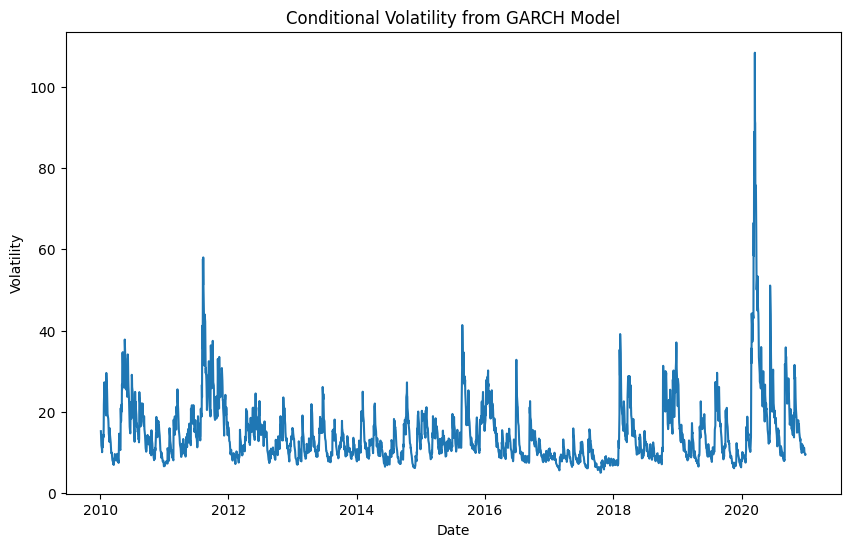

In [ ]:
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# Download S&P 500 data
data = DATA_DOWNLOAD.copy()


# Calculate daily returns and drop NaN values
data['Returns'] = data['Close'].pct_change() * 100
data = data.dropna()

# Fit a GARCH(1,1) model
garch_model = arch_model(data['Returns'], vol='EGarch', p=1, o=1, q=1)
garch_fit = garch_model.fit(update_freq=5)

# Print the summary of the model fit
print(garch_fit.summary())

# Plot the model's conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility * np.sqrt(trading_days))
plt.title('Conditional Volatility from GARCH Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


# Vectorized AutoRegression

Vector Autoregression (VAR) and Seasonal Autoregressive Integrated Moving Average with Exogenous Variables (SARIMAX) are both powerful tools in time series analysis, but they are used for different purposes and have distinct characteristics.

### Vector Autoregression (VAR):

1. **Multivariate Model**: VAR models multiple time series simultaneously. It is used when you have two or more interrelated time series and you're interested in capturing the relationship between them.

2. **Structure**: In a VAR model, each variable is a linear function of past lags of itself and past lags of all other variables in the system.

3. **Symmetry**: VAR treats all variables symmetrically. There's no distinction between dependent and independent variables; all variables in the model are treated as endogenous.

4. **Use Cases**: VAR is particularly useful for analyzing and forecasting systems of interrelated time series and for studying the dynamic impact of random disturbances on the system of variables.

5. **Lack of Exogenous Control**: Traditional VAR models don't include exogenous variables or controls. They focus only on the interrelationships of the variables included in the model.

### Seasonal ARIMA with Exogenous Variables (SARIMAX):

1. **Univariate with Exogenous Variables**: SARIMAX is primarily a univariate time series model which is extended to include seasonality (SARIMA) and exogenous variables (X).

2. **Structure**: It models a single time series based on its own past values (auto-regression), the differences of the series (integration), moving averages, and also external factors (exogenous variables).

3. **Seasonality and Non-Stationarity**: SARIMAX is particularly useful for modeling univariate time series data that exhibit non-stationarity, seasonality, and can be influenced by external or exogenous factors.

4. **Forecasting**: SARIMAX is commonly used for forecasting a single time series where external factors are known or can be estimated.

5. **Control and Flexibility**: Allows for the inclusion of external influences and the modeling of seasonal components, making it versatile for many practical forecasting problems.

### Comparison:

- **Use Case**: VAR is used for multivariate time series analysis without external control variables, while SARIMAX is for univariate series with the potential inclusion of external variables and seasonality.

- **Model Complexity**: VAR models can become complex with many variables due to the large number of parameters, while SARIMAX's complexity depends more on the order of the AR, MA, and seasonal components, as well as the number of exogenous variables.

- **Interpretability**: SARIMAX, being primarily univariate, can be easier to interpret in terms of the impact of exogenous variables on the target series. VAR's interpretation focuses on the interdependencies among the variables.

In summary, the choice between VAR and SARIMAX depends on the nature of your data and your analysis objectives. VAR is more suitable for understanding and predicting the behavior of interrelated time series, while SARIMAX is better for forecasting a single time series with considerations for seasonality, non-stationarity, and external influences.

## Data

In [ ]:
import pandas_datareader as pdr
import datetime as dt

# Define the start and end dates for the data
start = dt.datetime(1990, 1, 1)
end = dt.datetime.now()

# Download macroeconomic data from FRED
gdp = pdr.get_data_fred('GDP', start, end)  # Gross Domestic Product
unrate = pdr.get_data_fred('UNRATE', start, end)  # Unemployment Rate
fedfund = pdr.get_data_fred('FEDFUNDS', start, end)  # Federal Funds Rate

# Combine the datasets
macro_data = gdp.join(unrate, how='inner').join(fedfund, how='inner')

# Display the first few rows of the dataset
print(macro_data.head())


                 GDP  UNRATE  FEDFUNDS
DATE                                  
1990-01-01  5872.701     5.4      8.23
1990-04-01  5960.028     5.4      8.26
1990-07-01  6015.116     5.5      8.15
1990-10-01  6004.733     5.9      8.11
1991-01-01  6035.178     6.4      6.91


## VAR

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Jan, 2024
Time:                     01:29:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -12.4346
Nobs:                     124.000    HQIC:                  -13.6906
Log likelihood:           467.244    FPE:                4.95677e-07
AIC:                     -14.5498    Det(Omega_mle):     2.53787e-07
--------------------------------------------------------------------
Results for equation GDP
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000414         0.003476            0.119           0.905
L1.GDP               0.793074         0.172870            4.588           0.000
L1.UNRATE            0.049126         0.005927            8.288   

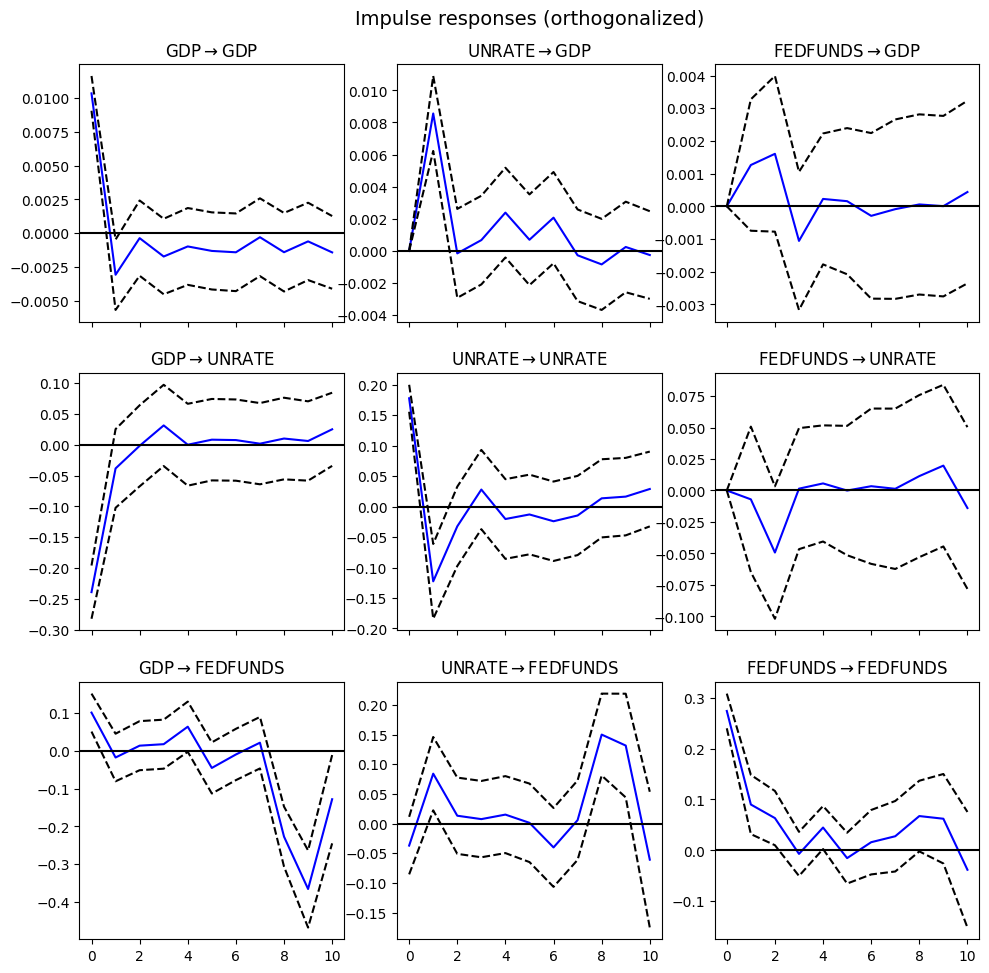

In [ ]:

from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

data = macro_data.copy()

# Convert to percent changes
macro_data_pct_change = data.pct_change().dropna()

# Fitting a VAR model on percent changes
model_pct_change = VAR(macro_data_pct_change)
results_pct_change = model_pct_change.fit(maxlags=15, ic='aic')

# Print a summary of the model results
print(results_pct_change.summary())

# Plot the impulse response
irf_pct_change = results_pct_change.irf(10)
irf_pct_change.plot(orth=True)
plt.show()

# Regularized VAR

In the context of VAR models, regularization can be implemented in several ways, but the most common approaches involve LASSO (Least Absolute Shrinkage and Selection Operator) and Ridge regression techniques. These methods add a penalty to the loss function used to estimate the model parameters, which helps in controlling for overfitting and can lead to more robust models in cases of multicollinearity or when working with many time series.

### Regularized VAR Models:

1. **LASSO (L1 Regularization)**: This method adds a penalty equal to the absolute value of the magnitude of coefficients. In the context of VAR, this can lead to some coefficients being shrunk entirely to zero, effectively performing variable selection and reducing model complexity.

2. **Ridge (L2 Regularization)**: Ridge regression adds a penalty equal to the square of the magnitude of coefficients. Unlike LASSO, Ridge tends to shrink coefficients but not set them to zero, which can be useful when all variables are believed to have some effect on the response variable.

3. **Elastic Net**: This is a combination of LASSO and Ridge regularization methods. It can be particularly effective when there are multiple correlated variables.

### Implementation:

Implementing a regularized VAR model is not as straightforward as a standard VAR model, especially since most statistical packages like `statsmodels` in Python do not directly support regularized VAR models out of the box. However, you can implement these models using more general-purpose optimization libraries in Python, such as `scikit-learn`, which offers LASSO and Ridge regression methods. Alternatively, researchers and practitioners sometimes manually implement these models to suit their specific needs.

### Usage Considerations:

- Regularized VAR models are particularly useful when dealing with large datasets with many time series (high-dimensional data) where traditional VAR models might overfit or become computationally infeasible.

- The choice between LASSO, Ridge, or Elastic Net regularization depends on the specific characteristics of the data and the underlying theoretical considerations of the problem at hand.

- Regularization introduces hyperparameters (like the regularization strength) that need to be tuned, often using techniques like cross-validation.

In summary, while regularized VAR models are less commonly used and require more custom implementation efforts, they can be valuable tools in certain contexts, especially when dealing with complex, high-dimensional time series datasets.

## Data

In [ ]:
import pandas_datareader as pdr
import datetime as dt

# Define the start and end dates for the data
start = dt.datetime(1990, 1, 1)
end = dt.datetime.now()

# Download macroeconomic data from FRED
gdp = pdr.get_data_fred('GDP', start, end)  # Gross Domestic Product
unrate = pdr.get_data_fred('UNRATE', start, end)  # Unemployment Rate
fedfund = pdr.get_data_fred('FEDFUNDS', start, end)  # Federal Funds Rate

# Combine the datasets
macro_data = gdp.join(unrate, how='inner').join(fedfund, how='inner')

# Display the first few rows of the dataset
print(macro_data.head())


                 GDP  UNRATE  FEDFUNDS
DATE                                  
1990-01-01  5872.701     5.4      8.23
1990-04-01  5960.028     5.4      8.26
1990-07-01  6015.116     5.5      8.15
1990-10-01  6004.733     5.9      8.11
1991-01-01  6035.178     6.4      6.91


## LASSO VAR

In [ ]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
from sklearn.linear_model import Lasso
import numpy as np

# Function to create lagged features for VAR modeling
def create_lagged_features(df, lags=1):
    var_names = df.columns
    for var in var_names:
        for lag in range(1, lags + 1):
            df[f'{var}_lag_{lag}'] = df[var].shift(lag)
    df.dropna(inplace=True)
    return df

# Combining the data
data = macro_data.copy()

# Creating lagged features
lags = 5  # Number of lags
macro_data_lagged = create_lagged_features(data, lags)

# Separating target and predictors
targets = macro_data_lagged[macro_data.columns]
predictors = macro_data_lagged.drop(columns=macro_data.columns)

# Fit a LASSO model
lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization parameter
lasso_model.fit(predictors, targets)

# Coefficients
print(f'Lasso coefficients:\n {lasso_model.coef_}')


Lasso coefficients:
 [[ 1.47922224e+00 -2.93715836e-01 -1.18929297e-01 -4.76138911e-02
  -1.31243257e-02  2.00250041e+02 -1.38331861e+02  6.99381516e+00
  -9.89122535e+00 -1.85368094e+01  1.47871373e+01  1.24359989e+02
  -1.69401575e+02  7.02344919e+01 -3.25922599e+01]
 [-1.84010634e-03  1.43221680e-03  4.06756071e-04 -8.15374869e-05
   9.98169397e-05  3.22344787e-01  3.32212283e-01  6.52308074e-02
   4.01236682e-02  9.71214383e-03 -9.51017721e-02 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.65108771e-02]
 [ 3.31733487e-04 -4.91912768e-05  1.56811805e-05 -8.88618698e-05
  -2.36626040e-04 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -2.81162869e-03 -7.42829658e-03  9.79003465e-01  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -7.66252128e-02]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.560e+06, tolerance: 4.038e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.305e+01, tolerance: 4.433e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.304e+01, tolerance: 6.179e